In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from math import pi
from utils import data_treatment
import autolab.autolab

In [2]:
path = "G:\\Andere Computer\\My Computer\\HPS Data\\SECM Software Measurements\\230621"
os.listdir(path)
def filename (number: str) -> str:
    return f"{number} Linear Sweep Voltammetry.dat"

def area_circle(diameter: float) -> float:
    return pi * (0.5 * diameter)**2

def current_density(current: float) -> float:
    area = area_circle(0.05)
    return current/area

def scale_to_rhe(potential: float) -> float:
    return 0.8555 + 0.207 + potential 

filename_list = ["002", "004", "007"]

for file in filename_list:
    full_path = os.path.join(path, filename(file))
    df = pd.read_table(full_path, sep = ",", skiprows = 14)
    df["current density"] = df[" Current WE1 [A]"].map(current_density)
    # plt.plot(df["# Potential [V]"], df[" Current WE1 [A]"], label = file)
    # plt.legend()
    # plt.xlabel("Potential [V]")
    # plt.ylabel("current density [j/ cm^2]")

In [3]:
df = pd.read_table(full_path, sep = ",", skiprows= 14)
df

,# Potential [V],Current WE1 [A]
0,0.005035,-1.976929e-05
1,0.010071,-1.754456e-05
2,0.015106,-1.891174e-05
3,0.020142,-1.737976e-05
4,0.025177,-1.813049e-05
...,...,...
293,1.480408,2.424622e-06
294,1.485443,-4.327393e-07
295,1.490479,2.389526e-06
296,1.495514,7.723999e-07


In [4]:
df["current density"] = df[" Current WE1 [A]"].map(current_density)

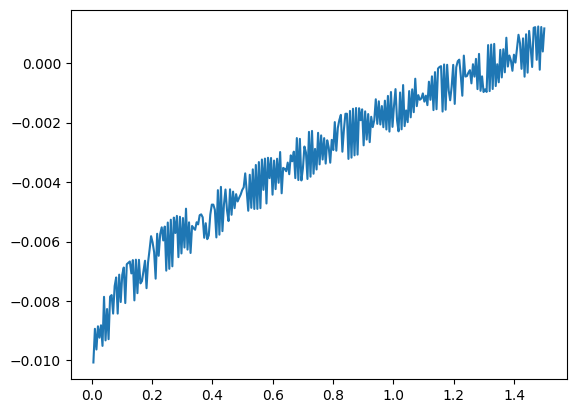

In [5]:
plt.plot(df["# Potential [V]"], df["current density"])

In [6]:
config = {
    'adk': 'E:\\Metrohm\\config\\Adk',
    'sdk': 'E:\\Metrohm\\EcoChemie.Autolab.Sdk',
    'hsf': 'E:\\Metrohm\\Hardware Setup Files\\PGSTAT302N\\HardwareSetup.xml',
    'sim': False
}
potentiostat = autolab.autolab.Potentiostat(config)
#procedure = potentiostat.instrument.LoadProcedure(os.path.join(path, file))

In [7]:
for file in files:
    df = potentiostat.nox_parser(os.path.join(directory,file), "LSV staircase")
    plt.figure()
    plt.plot(df["Potential applied"], df["WE(1).Current"], label = file)
plt.show

NameError: name 'files' is not defined

In [8]:
name = "line sweep"

for n in range(5):
    filename = os.path.join(path, f"secmpy semiauto test {n}.nox")
    print(filename)

G:\Andere Computer\My Computer\HPS Data\SECM Software Measurements\230621\secmpy semiauto test 0.nox
G:\Andere Computer\My Computer\HPS Data\SECM Software Measurements\230621\secmpy semiauto test 1.nox
G:\Andere Computer\My Computer\HPS Data\SECM Software Measurements\230621\secmpy semiauto test 2.nox
G:\Andere Computer\My Computer\HPS Data\SECM Software Measurements\230621\secmpy semiauto test 3.nox
G:\Andere Computer\My Computer\HPS Data\SECM Software Measurements\230621\secmpy semiauto test 4.nox


In [9]:
path = "G:\\Andere Computer\\My Computer\\HPS Data\\SECM Software Measurements"
directory_content= os.listdir(path)

In [10]:
plt.rcParams['figure.dpi'] = 300
# for item in directory_content:
#     object_path = os.path.join(path, item)
#     if os.path.isdir(object_path):
#         plt.figure()
#         for file in os.listdir(object_path):
#             file_path = os.path.join(object_path, file)
#             df = pd.read_table(file_path, sep = ",", skiprows = 14)
#             df["current density"] = df[" Current WE1 [A]"].map(current_density)
#             plt.plot(df["# Potential [V]"], df["current density"], label = file)
#             plt.legend()
#             plt.xlabel("Potential [V]")
#             plt.ylabel("current density [j/ cm^2]")
            

In [11]:
path = "G:\\Andere Computer\\My Computer\\HPS Data\\Autolab\\NovaProcedure"
file = "011_001_NovaProcedure.nox"

OCP Histogram and Statistics on OCP Values


In [39]:
ocp_data = pd.DataFrame(columns= ["OCP value"])
ocp_list = []
file_list = []
for file in os.listdir(path):
    if file.startswith("017_"): #and int(file[4:7]) > 50:
        file_list.append(file)
        procedure = potentiostat.instrument.LoadProcedure(os.path.join(path, file))
        command = procedure.Commands["OCP after"]
        ocp_list.append(command.Signals.get_Item("OCP value").Value)
ocp_data["OCP value"] = ocp_list
ocp_data["ocp vs rhe"] = ocp_data["OCP value"].map(scale_to_rhe)
len(ocp_list)

100

In [40]:
#ocp_data = ocp_data.drop(index = 34)
#ocp_data = ocp_data[ocp_data["OCP value"] < 0.0]
#ocp_data = ocp_data[ocp_data["OCP value"] > -0.8]
ocp_data

,OCP value,ocp vs rhe
0,1.475417,2.537917
1,1.470546,2.533046
2,1.434323,2.496823
3,1.470238,2.532738
4,1.454441,2.516941
...,...,...
95,0.945539,2.008039
96,1.029466,2.091966
97,0.963996,2.026496
98,0.975530,2.038030


1.0111768236347272 mean
0.40117974634221626 std
0.16094518887520498 variance
1.1636068306717224 median


3.967453930561373

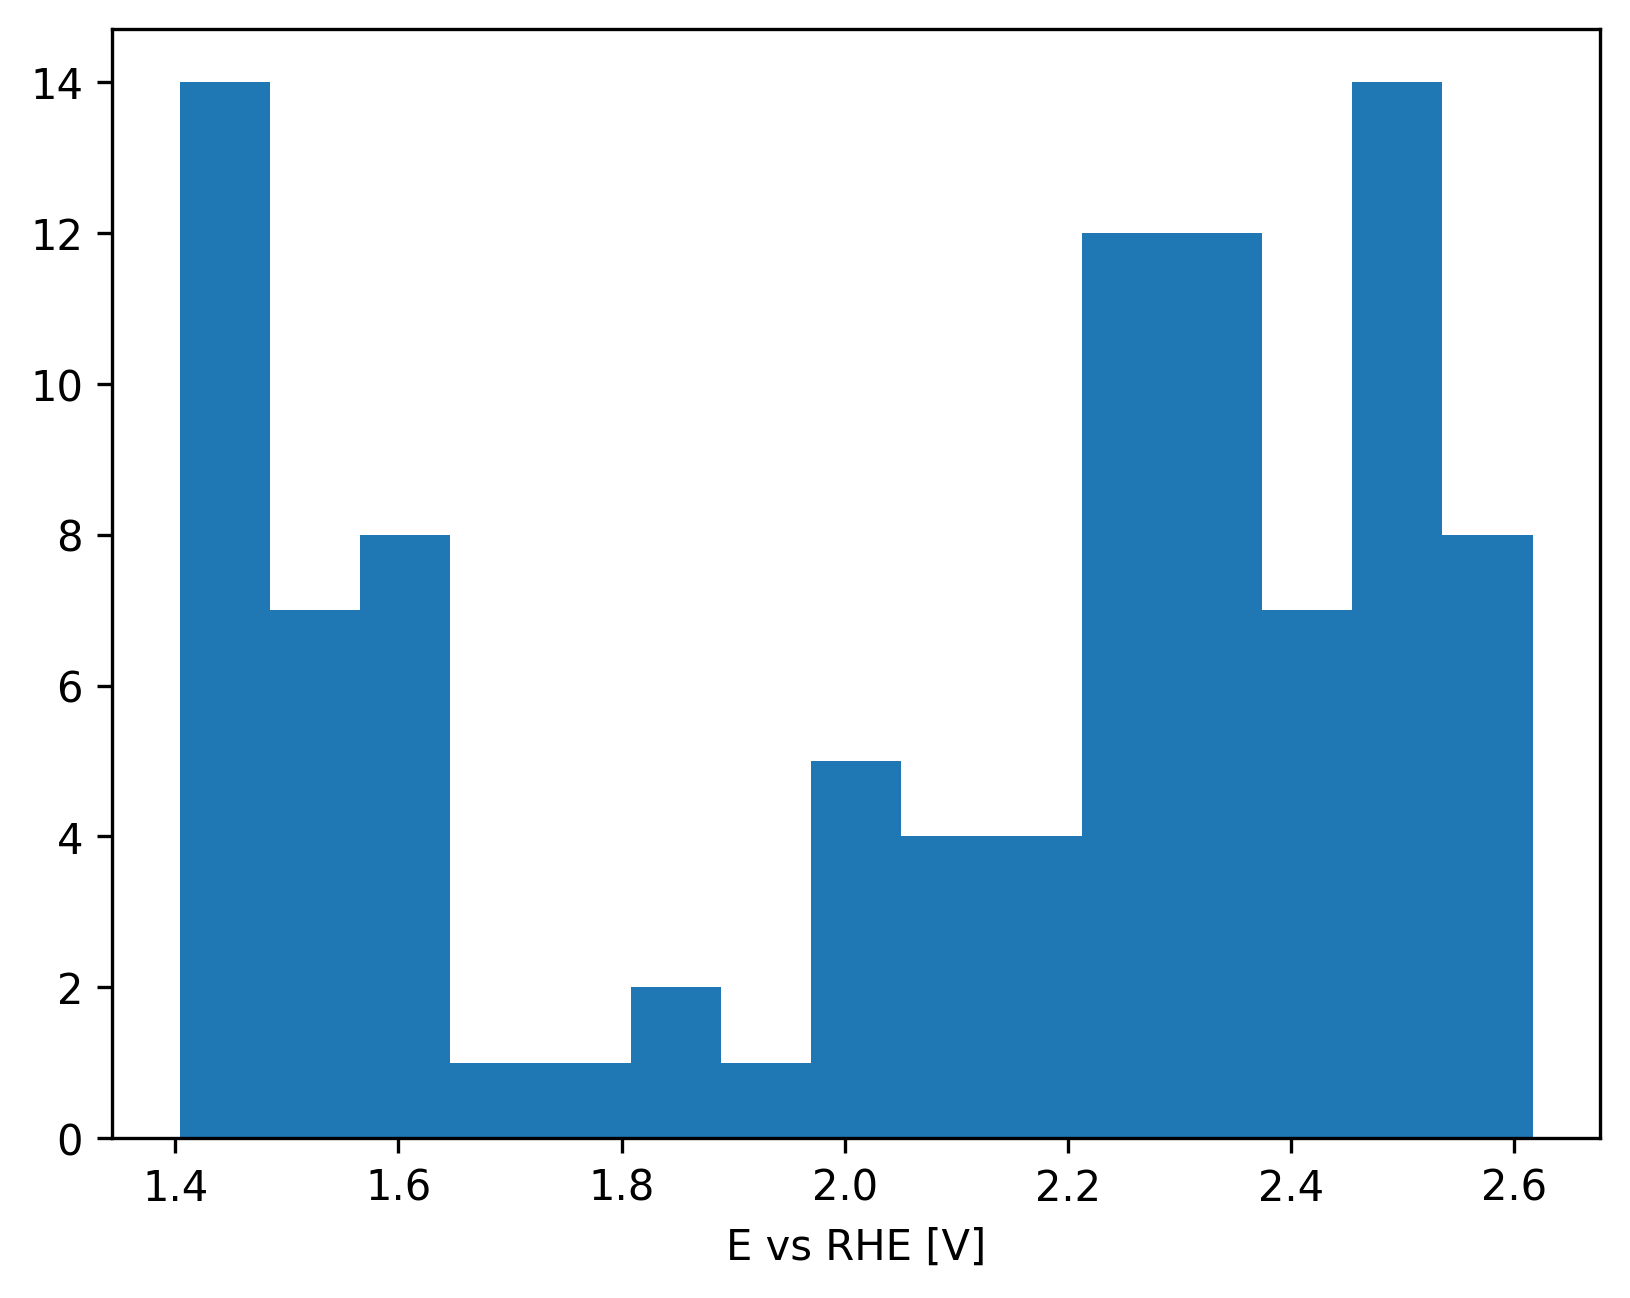

In [47]:
#plt.rcParams['figure.dpi'] = 300
print(ocp_data["OCP value"].mean(), "mean")
print(ocp_data["OCP value"].std(), "std")
print(ocp_data["OCP value"].var(), "variance")
print(ocp_data["OCP value"].median(), "median")
ocp_data.hist(column=["ocp vs rhe"], bins = 15)
plt.grid(False)
plt.xlabel("E vs RHE [V]")
plt.title(label = "placeholder", visible = False)
std_error = (float(ocp_data["OCP value"].std())/np.sqrt(len(ocp_data)))
error_percent = abs(100*(std_error/float(ocp_data["OCP value"].mean())))
error_percent

OCP value    1.011177
dtype: float64 mean
OCP value    0.40118
dtype: float64 std
OCP value    0.160945
dtype: float64 variance
OCP value    1.163607
dtype: float64 median


C:\Users\Henrik Spitzenpfeil\AppData\Local\Temp\ipykernel_5768\3632173571.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  std_error = (float(ocp_data.std())/np.sqrt(len(ocp_data)))
C:\Users\Henrik Spitzenpfeil\AppData\Local\Temp\ipykernel_5768\3632173571.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  error_percent = abs(100*(std_error/float(ocp_data.mean())))


3.967453930561373

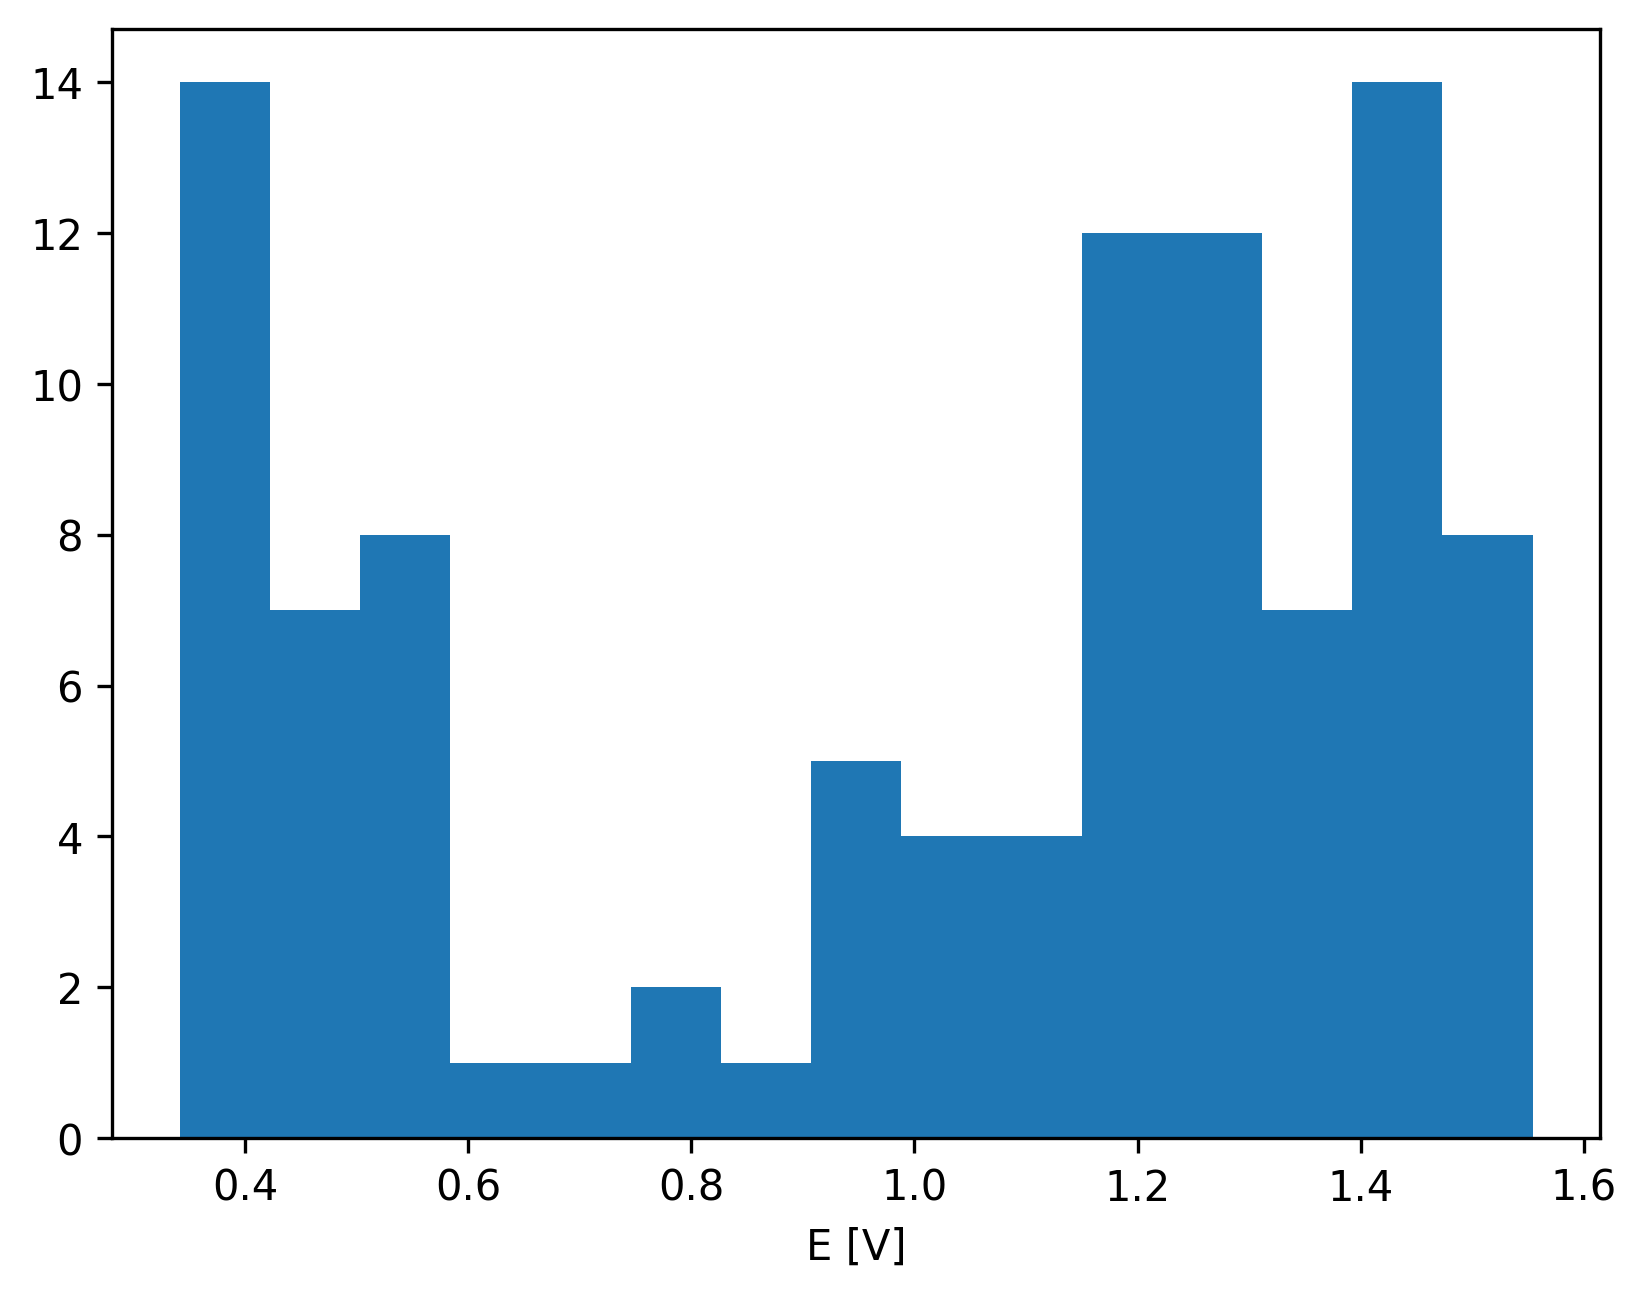

In [ ]:
#plt.rcParams['figure.dpi'] = 300
print(ocp_data.mean(), "mean")
print(ocp_data.std(), "std")
print(ocp_data.var(), "variance")
print(ocp_data.median(), "median")
ocp_data.hist(column=["OCP value"], bins = 15)
plt.grid(False)
plt.xlabel("E [V]")
plt.title(label = "placeholder", visible = False)
std_error = (float(ocp_data.std())/np.sqrt(len(ocp_data)))
error_percent = abs(100*(std_error/float(ocp_data.mean())))
error_percent

In [15]:
procedure = potentiostat.instrument.LoadProcedure(os.path.join(path,file))
for command in procedure.Commands.Names:
    print(command)


# command = procedure.Commands["Record signals (>1 ms) galvanostatic"]
# ca_dataframe = pd.DataFrame()
# for column in command.Signals.Names:
#     print(column)
    #ca_dataframe[column] = list(command.Signals.get_Item(column).Value)
#ca_dataframe["current density"] = ca_dataframe["WE(1).Current"].map(current_density)

#plt.plot(ca_dataframe["Corrected time"][200:2100], ca_dataframe["current density"][200:2100], '.')

Cyclic voltammetry potentiostatic
Autolab control
OCP determination
E vs t
Custom
!!Hidden command, this should not be displayed
Set potential
Set cell
Wait time (s)
Optimize current range
CV staircase
i vs E
Wait time (s)
Optimize current range
Overpotential CV
i vs E
Set cell
Wait time (s)
OCP after
E vs t
Custom
!!Hidden command, this should not be displayed


In [16]:
file = "017_011_NovaProcedure.nox"
procedure = potentiostat.instrument.LoadProcedure(os.path.join(path,file))
command = procedure.Commands["Overpotential CV"]
# for column in command.Signals.Names:
#     print(command.Signals.get_Item(column).Value)
#     print(column)
df = pd.DataFrame()
for column in command.Signals.Names:
    if len(list(command.Signals.get_Item(column).Value)) != 0:
        df[column] = list(command.Signals.get_Item(column).Value)
df["current density"] = df["WE(1).Current"].map(current_density)
#print(df.to_markdown())


# Linear regression around the point where j = 0.01 to determine overpotential
line_fit_table = df.loc[(df["current density"]> 0.008) & (df["current density"] < 0.015) & (df["Index"] < 250)]
line_fit = np.polyfit(line_fit_table["Potential applied"], line_fit_table["current density"], 1)
def line_function (x):
    return line_fit[0]*x + line_fit[1]

fit_list = []
for values in line_fit_table["Potential applied"]:
    fit_list.append(line_function(values))

#plt.plot(line_fit_table["Potential applied"], fit_list)
#plt.plot(line_fit_table["Potential applied"], line_fit_table["current density"])

#(0.01-line_fit[1])/line_fit[0]

CV Analysis


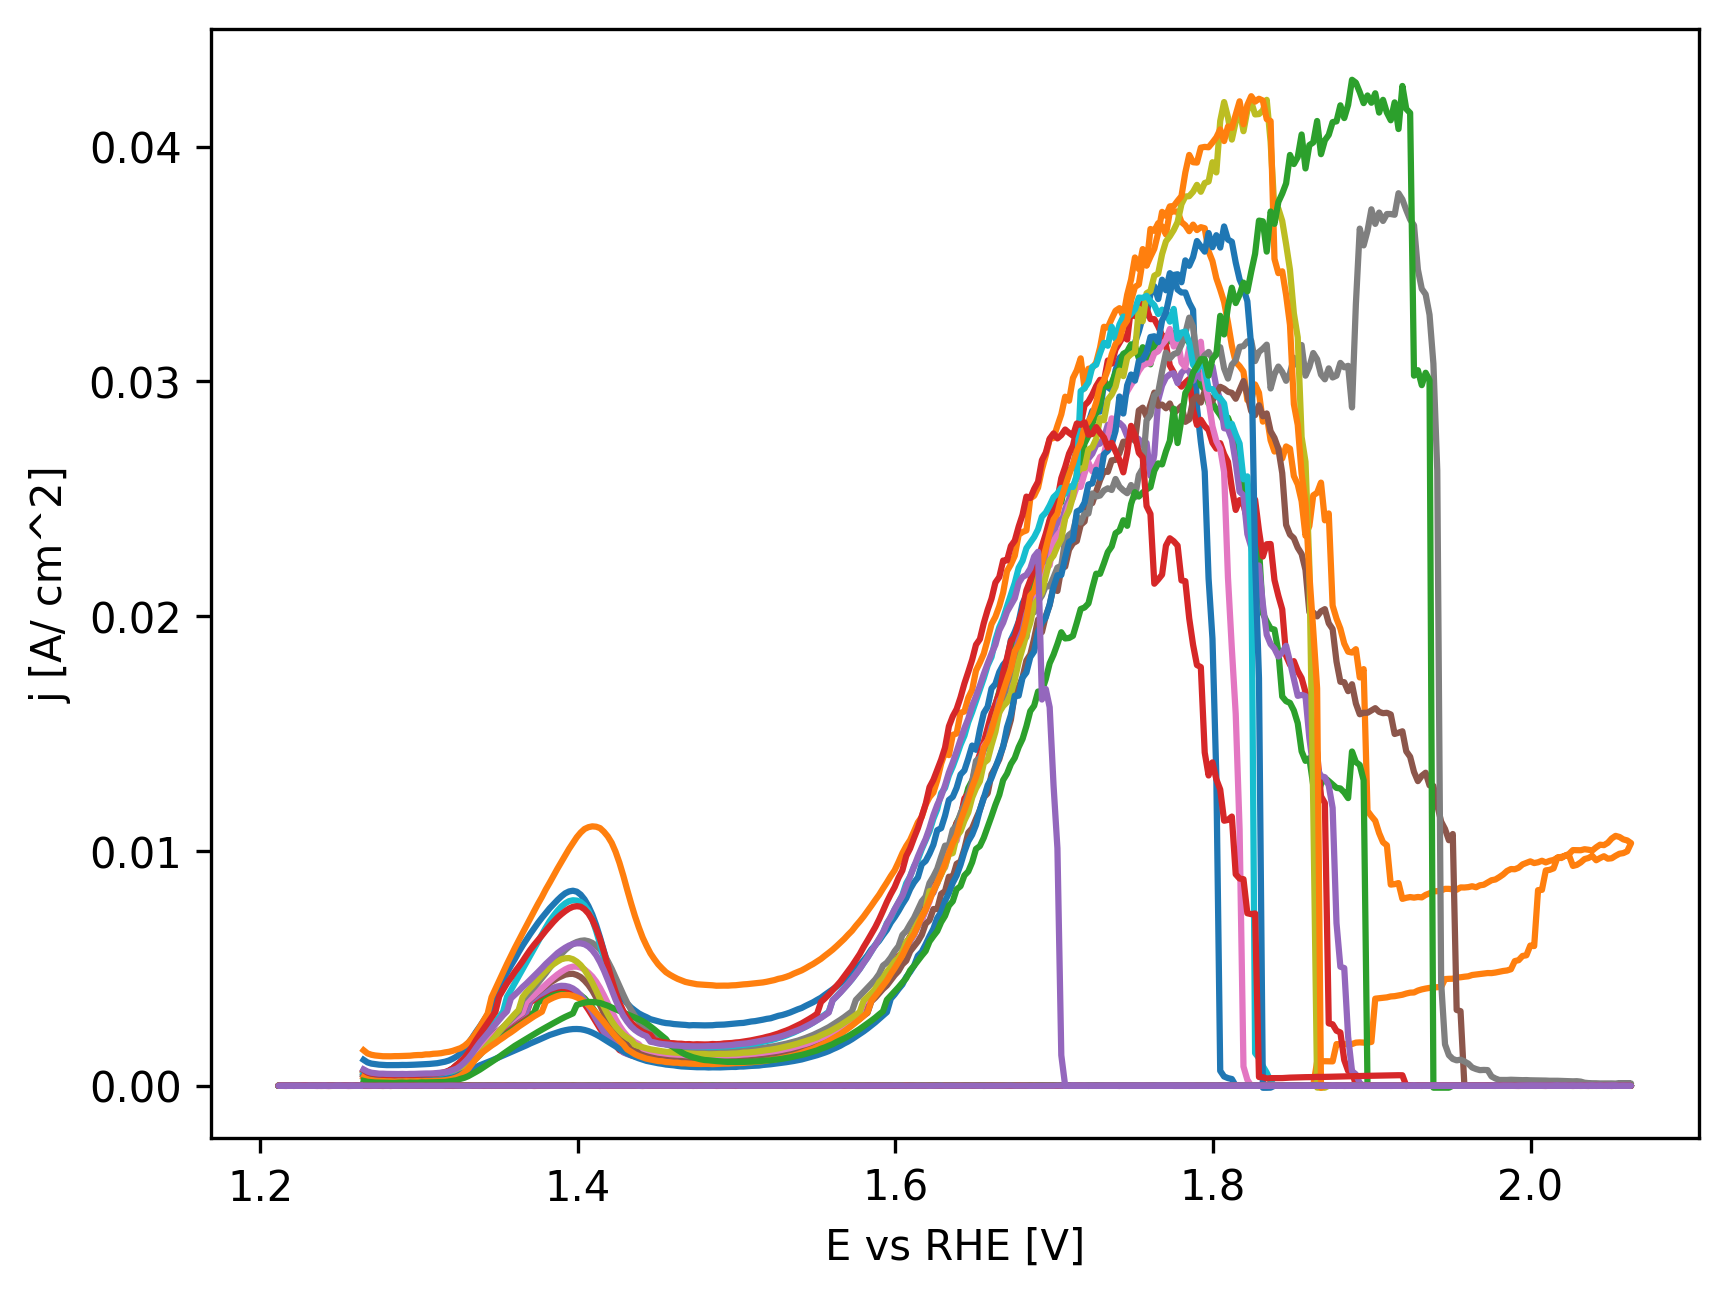

In [17]:
command_name = "Overpotential CV"
scan = 1
list_of_files = []
for file in os.listdir(path):
    if file.startswith("017_"): #and int(file[4:7]) < 51:
        list_of_files.append(file)

for file in list_of_files[0:15]:
    df = pd.DataFrame()
    procedure = potentiostat.instrument.LoadProcedure(os.path.join(path,file))
    command = procedure.Commands[command_name]
    for column in command.Signals.Names:
        if len(list(command.Signals.get_Item(column).Value)) != 0:
            df[column] = list(command.Signals.get_Item(column).Value)
    df["current density"] = df["WE(1).Current"].map(current_density)
    df["potential vs rhe"] = df["Potential applied"].map(scale_to_rhe)
    df = df.loc[df['Scan'] == scan]
    plt.plot(df["potential vs rhe"], df["current density"], label = file)
    plt.xlabel("E [V] vs RHE")
plt.ylabel(r"j [$A/ cm^2$]")
    #plt.legend()

0.0022540328670901198
698 698
3.5227003231363243


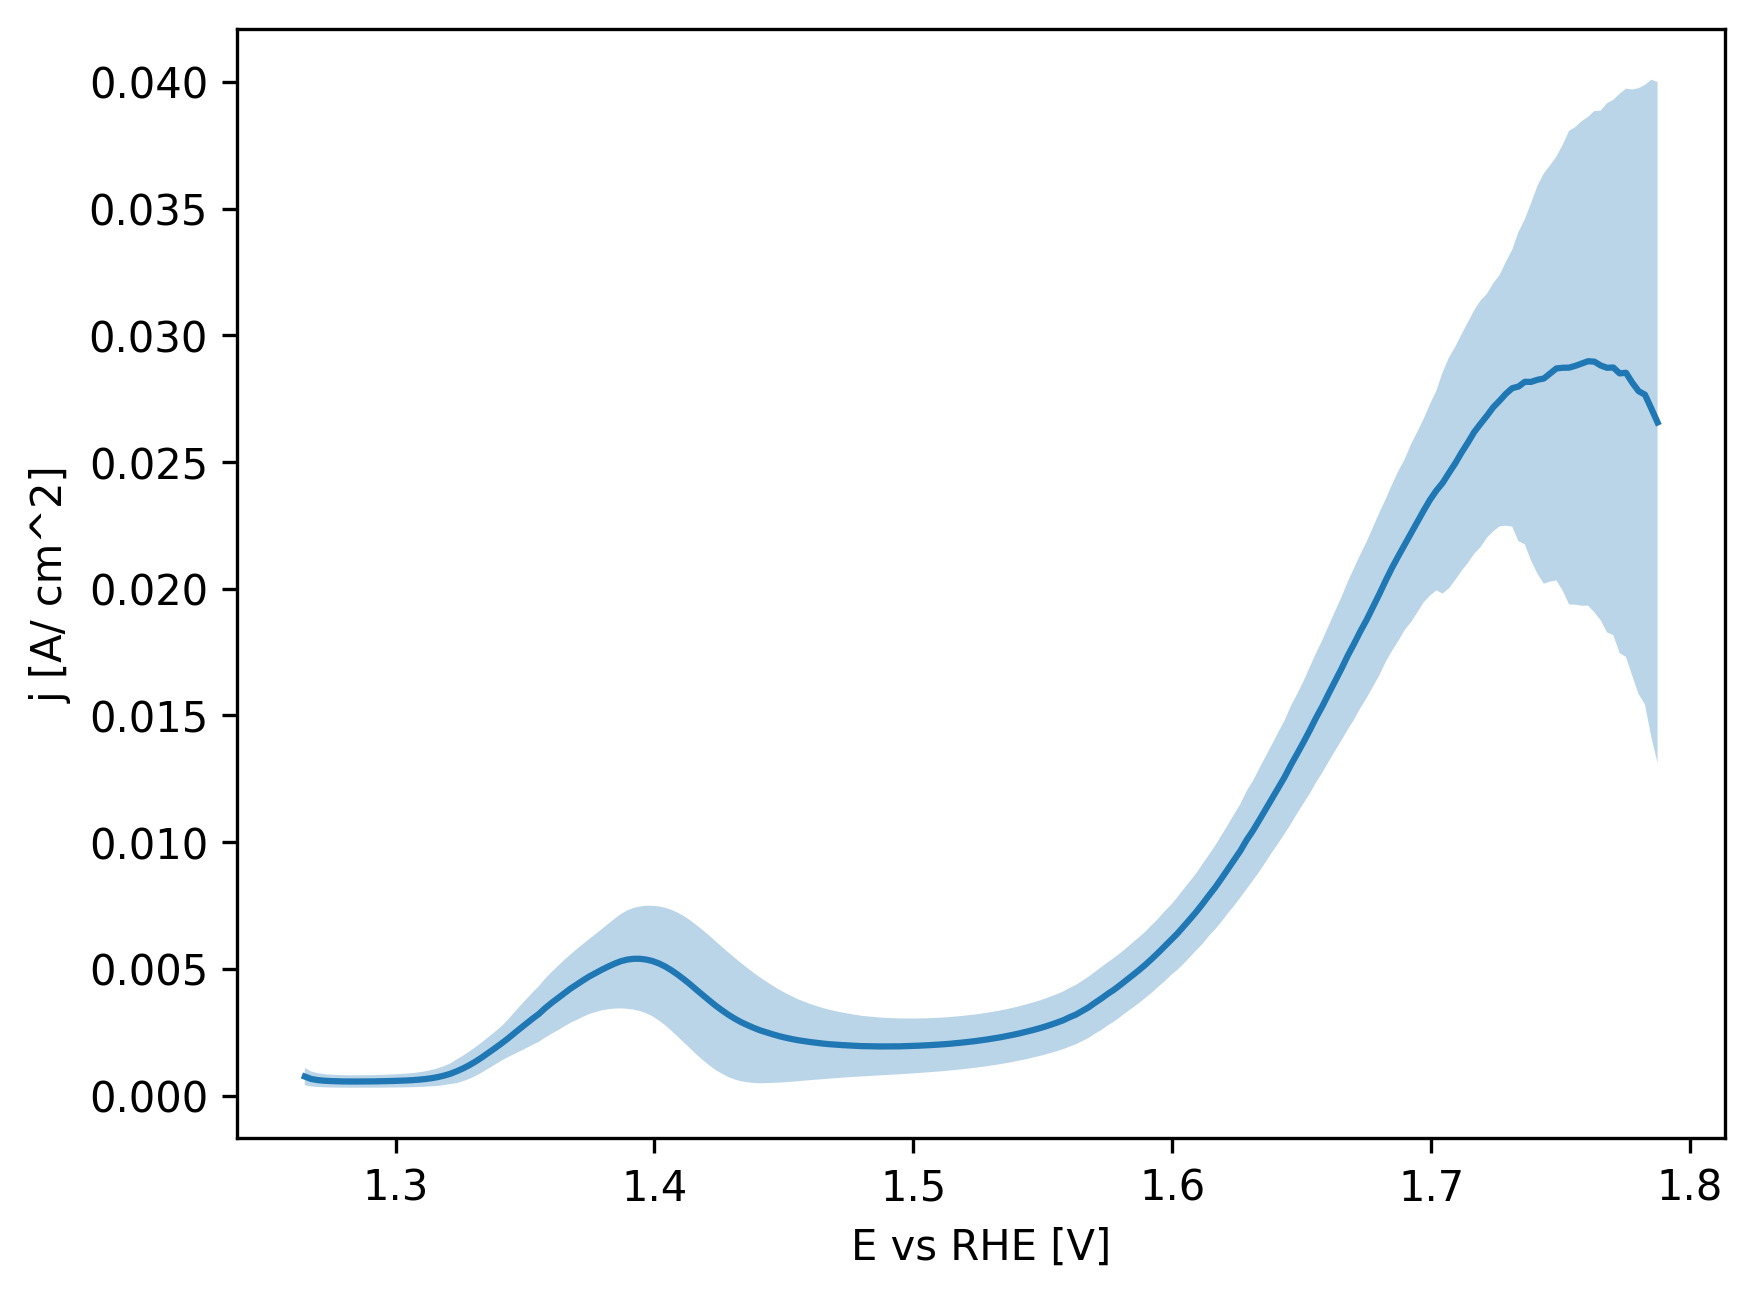

In [20]:
scan == 1
current_density_aggregated = pd.DataFrame()
for file in list_of_files[:]:
    df = pd.DataFrame()
    procedure = potentiostat.instrument.LoadProcedure(os.path.join(path,file))
    command = procedure.Commands[command_name]
    for column in command.Signals.Names:
        if len(list(command.Signals.get_Item(column).Value)) != 0:
            df[column] = list(command.Signals.get_Item(column).Value)
    df["current density"] = df["WE(1).Current"].map(current_density)
    df["potential vs rhe"] = df["Potential applied"].map(scale_to_rhe)
    df = df.loc[df['Scan'] == scan]
    current_density_aggregated.insert(0,file,df["current density"])

avarage_cv = np.array(current_density_aggregated.mean(axis=1))
standard_deviations = np.array(current_density_aggregated.std(axis=1))
print(standard_deviations.mean())

error_percent_list = []
for i in range(len(standard_deviations)):
    std_error = (standard_deviations[i]/np.sqrt(len(list_of_files)))
    error_percent = 100*(std_error/avarage_cv[i])
    error_percent_list.append(error_percent)
#std_error = (float(ocp_data.std())/np.sqrt(len(list_of_files)))
#error_percent = 100*(std_error/float(ocp_data.mean()))
#error_percent
#print(np.array(error_percent_list).mean())

left_bound = 0
right_bound = 215



print(len(standard_deviations), len(avarage_cv))
plt.plot(df["potential vs rhe"][left_bound:right_bound], avarage_cv[left_bound:right_bound],)
plt.fill_between(df["potential vs rhe"][left_bound:right_bound],
                 np.subtract(avarage_cv, standard_deviations)[left_bound:right_bound],
                 np.add(avarage_cv, standard_deviations)[left_bound:right_bound],
                 alpha = 0.3,
                 where= np.subtract(avarage_cv, standard_deviations)[left_bound:right_bound] < np.add(avarage_cv, standard_deviations)[left_bound:right_bound],
                 interpolate= True)
plt.xlabel("E [V] vs RHE")
plt.ylabel(r"j [$A/ cm^2$]")

print(np.array(error_percent_list).mean())

In [22]:
def overpotential(polyfit: np.array) -> float:
    return (0.01-polyfit[1])/polyfit[0]

overpotential_list = []
ocp_correlation_list = []
for file in list_of_files[:]:
    df = pd.DataFrame()
    procedure = potentiostat.instrument.LoadProcedure(os.path.join(path,file))
    command = procedure.Commands[command_name]
    for column in command.Signals.Names:
        if len(list(command.Signals.get_Item(column).Value)) != 0:
            df[column] = list(command.Signals.get_Item(column).Value)

    df["current density"] = df["WE(1).Current"].map(current_density)
    df["potential vs rhe"] = df["Potential applied"].map(scale_to_rhe)
    df = df.loc[df['Scan'] == scan]
    line_fit_table = df.loc[(df["current density"]> 0.008) & (df["current density"] < 0.015) & (df["Index"] < 250)]
    
    if line_fit_table.empty:
        pass
    else:
        #collect ocp value if there is an overpotential
        command = procedure.Commands["OCP determination"]
        ocp_correlation_list.append(command.Signals.get_Item("OCP value").Value)

        #compute overpotential at 0.01 A/cm-2
        line_fit = np.polyfit(line_fit_table["potential vs rhe"], line_fit_table["current density"], 1)
        overpotential_list.append(overpotential(line_fit))

Text(0, 0.5, '$\\eta_{10\\ mA\\ cm^{-2}}$ vs RHE [V]')

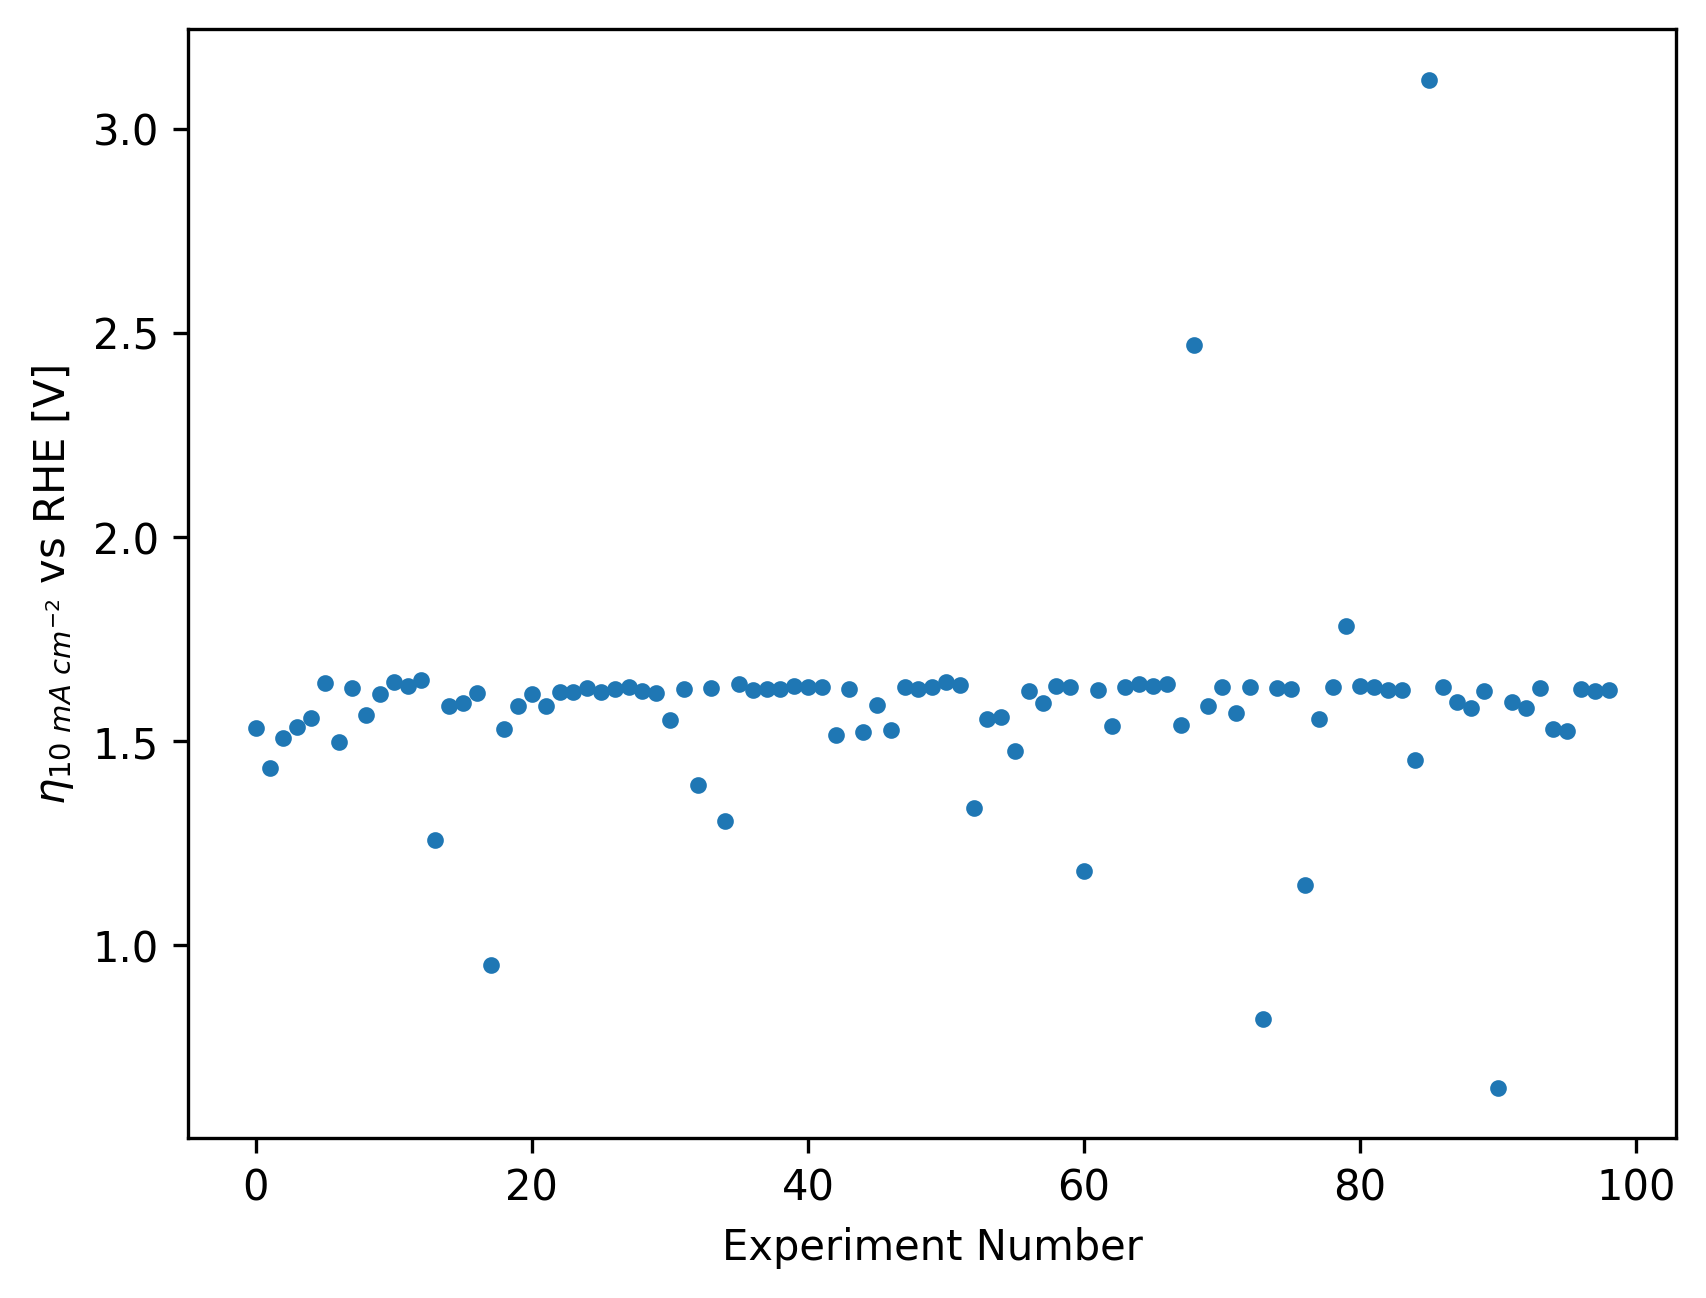

In [34]:
plt.plot(range(len(overpotential_list)), overpotential_list, '.')
plt.xlabel("Experiment Number")
plt.ylabel(r"$\eta_{10\ mA\ cm^{-2}}$ vs RHE [V]")

In [38]:
mean = np.asarray(overpotential_list).mean()
print("mean overpotential =", mean)
std = np.asarray(overpotential_list).std()
print("error % =", std/np.sqrt(len(overpotential_list))*100)
print("standard deviation =", std)

mean overpotential = 1.5806367039822724
error % = 2.4513282437871817
standard deviation = 0.24390408067928795


In [ ]:
error_list = []
for value in overpotential_list:
    error = (abs(value-np.asarray(overpotential_list).mean())/(np.asarray(overpotential_list).mean()))*100
    error_list.append(error)

np.asarray(error_list).mean()

In [ ]:
overpotential_list

Text(0, 0.5, 'j [$A/ cm^2$]')

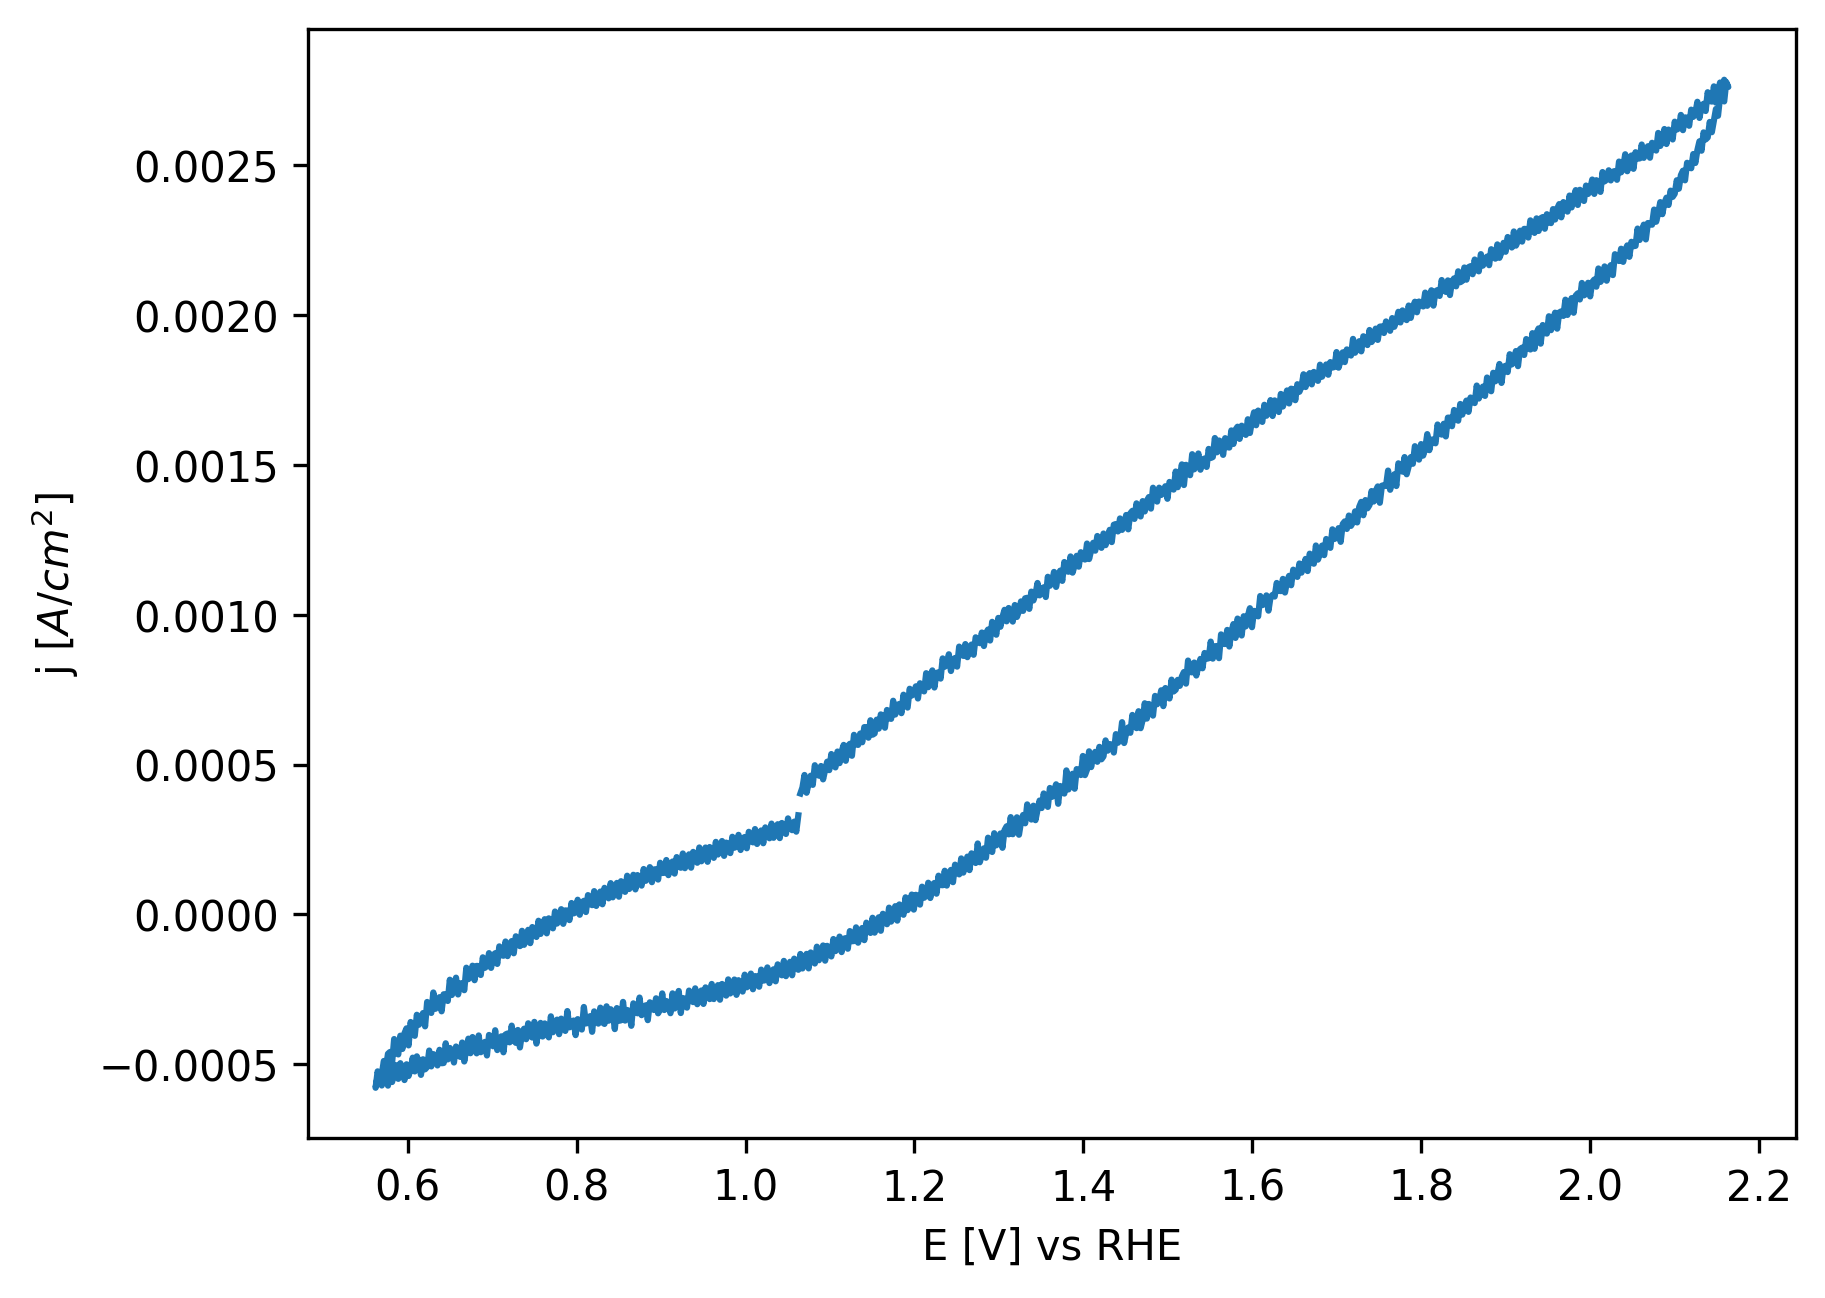

In [59]:
path = "G:\Andere Computer\My Computer\HPS Data\Autolab\Fresh Reference Characterisation"
file = "Noisy CV.nox"
df = pd.DataFrame()
procedure = potentiostat.instrument.LoadProcedure(os.path.join(path,file))
command = procedure.Commands["CV staircase"]
for column in command.Signals.Names:
    if len(list(command.Signals.get_Item(column).Value)) != 0:
        df[column] = list(command.Signals.get_Item(column).Value)
df["current density"] = df["WE(1).Current"].map(current_density)
df["potential vs rhe"] = df["Potential applied"].map(scale_to_rhe)
df = df.loc[df['Scan'] == 1]
plt.plot(df["potential vs rhe"], df["current density"], label = file)
plt.xlabel("E [V] vs RHE")
plt.ylabel(r"j [$A/ cm^2$]")